# 04. Redes neuronales densamente conectadas
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)

## Inicializaciones

In [1]:
try:
  # %tensorflow_version solo existe en Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


## 4.1 Caso de estudio: reconocimiento de dígitos

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


1


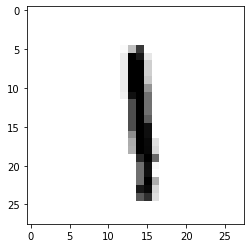

In [3]:
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])

In [4]:
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(x_train[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   

## 4.4 Función de activación softmax

Modelo con una capa softmax para visualizar los modelos aprendidos

In [5]:
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax', name="FC1", input_shape=(784,))
])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)

model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC1 (Dense)                  (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4711 - accuracy: 0.8768
10000/10000 - 1s - loss: 0.3086 - accuracy: 0.9162


[0.3085567438960075, 0.9162]

Figura 4.14 Modelo aprendido correspondiente al número 0

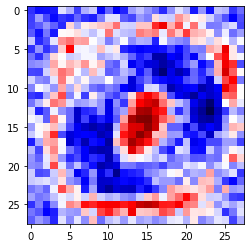

In [6]:
w = model.get_weights()
w = np.asarray(w[0])
plt.figure()
plt.imshow(w[:,0].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))

Figura 4.5 Matriz de parámetros correspondiente al modelo de la categoría cero

In [7]:
np.set_printoptions(precision=0, suppress = True, linewidth=220)
print(np.matrix (255*(w[:,0].reshape([28,28]))))

[[  13.   19.   18.   17.  -21.  -12.   10.  -11.  -16.   20.    3.   22.   15.   -8.  -15.   -7.    1.   14.   -6.  -20.  -13.   17.   -6.   18.  -15.  -12.   12.    1.]
 [  10.   -8.    8.   19.   11.   15.    2.   12.   16.   -2.  -20.  -21.    4.    9.   -7.   -2.  -33.  -18.  -17.  -46.  -37.  -28.  -30.  -18.   -5.    6.   21.    7.]
 [   9.    4.   -6.    3.   14.  -34.  -11.  -30.  -32.  -37.  -39.  -53.  -18.  -18.  -37.  -37.  -67.  -79.  -41.  -60.  -24.  -53.  -23.   -1.   -2.  -13.  -19.    8.]
 [   5.   18.   -0.   17.  -28.  -28.  -32.  -21.  -15.  -24.  -52.  -20.  -15.  -13.  -51.  -46.  -51.  -22.  -52.  -36.  -63.  -41.  -38.  -29.   -5.  -23.    1.   -8.]
 [ -16.   15.    6.  -21.  -47.  -53.  -43.  -45.  -26.  -19.   -2.  -13.  -25.   -5.  -12.  -10.   16.  -25.   -9.   -5.   -2.  -34.  -32.  -18.  -33.  -26.  -12.  -25.]
 [  12.   -6.   12.    3.  -36.  -74.  -24.  -24.  -22.  -38.  -22.  -31.   14.   19.   22.   19.   19.   18.    9.   20.    8.   -2.   -1.  -43.

Figura 4.16 Modelo aprendido correspondiente al número 3

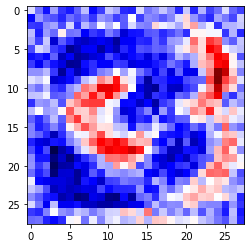

In [8]:
w = model.get_weights()
w = np.asarray(w[0])
plt.figure()
plt.imshow(w[:,3].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))